In [89]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
#ระบุที่อยู่ folder ของตัวเอง
%cd "/content/drive/MyDrive/Machine_Learning/Recommendation_KMean"

/content/drive/MyDrive/Machine_Learning/Recommendation_KMean


# **Data Science Life Cycle**

## **Business Understanding & Problem Definition**

เป้าหมาย: สร้างระบบแนะนำภาพยนตร์ (Movie Recommendation System)

เทคนิค: Collaborative Filtering โดยใช้โมเดล KNNWithMeans.

Dataset: MovieLens 100k ซึ่งเป็น Dataset มาตรฐานสำหรับงานนี้.

## **Data Understanding & Data Collection**

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

/tmp/ipython-input-1748781244.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [93]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [94]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [95]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [96]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [97]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [98]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [99]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/042509474X.0...,http://images.amazon.com/images/P/006091985X.0...
freq,1,27,632,13903,7535,2,2,2


In [100]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [101]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [102]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [103]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


In [104]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


## **Data Wrangling (Data Preparation/Cleaning)**

In [105]:
median_age = users['Age'].median()

# แทนที่ค่าอายุที่ต่ำกว่า 5 หรือมากกว่า 100 ด้วยค่ามัธยฐาน
users.loc[(users['Age'] < 5) | (users['Age'] > 100), 'Age'] = median_age

print("Age distribution after cleaning:")
print(users['Age'].describe())

Age distribution after cleaning:
count    168096.000000
mean         34.726246
std          13.584394
min           5.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         100.000000
Name: Age, dtype: float64


In [106]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [107]:
mean_age = users['Age'].mean()
users['Age'].fillna(mean_age, inplace=True)

/tmp/ipython-input-358159424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna(mean_age, inplace=True)


In [108]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,0


In [109]:
# ลบแถวที่มีค่า NaN ในคอลัมน์ 'Book-Author'
books.dropna(subset=['Book-Author', 'Publisher', 'Image-URL-L'], inplace=True)

In [110]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


In [111]:
print("Shape of books:", books.shape)
print("Shape of users:", users.shape)
print("Shape of ratings:", ratings.shape)

Shape of books: (271353, 8)
Shape of users: (278858, 3)
Shape of ratings: (1149780, 3)


In [112]:
df = pd.merge(ratings, users, on='User-ID', how='inner')

In [113]:
final_df = pd.merge(df, books, on='ISBN', how='inner')

In [114]:
final_df.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",34.726246,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,"seattle, washington, usa",34.726246,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,"h, new south wales, australia",16.000000,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,"rijeka, n/a, croatia",16.000000,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,"rijeka, n/a, croatia",16.000000,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [115]:
final_df.shape

(1031128, 12)

In [116]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031128 entries, 0 to 1031127
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031128 non-null  int64  
 1   ISBN                 1031128 non-null  object 
 2   Book-Rating          1031128 non-null  int64  
 3   Location             1031128 non-null  object 
 4   Age                  1031128 non-null  float64
 5   Book-Title           1031128 non-null  object 
 6   Book-Author          1031128 non-null  object 
 7   Year-Of-Publication  1031128 non-null  object 
 8   Publisher            1031128 non-null  object 
 9   Image-URL-S          1031128 non-null  object 
 10  Image-URL-M          1031128 non-null  object 
 11  Image-URL-L          1031128 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 94.4+ MB


In [117]:
final_df.describe()

,User-ID,Book-Rating,Age
count,1.031128e+06,1.031128e+06,1.031128e+06
mean,1.405946e+05,2.839032e+00,3.641922e+01
std,8.052485e+04,3.854147e+00,1.037984e+01
min,2.000000e+00,0.000000e+00,5.000000e+00
25%,7.041500e+04,0.000000e+00,3.100000e+01
50%,1.412100e+05,0.000000e+00,3.472625e+01
75%,2.114260e+05,7.000000e+00,4.100000e+01
max,2.788540e+05,1.000000e+01,1.000000e+02


In [118]:
final_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Location,0
Age,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0


In [119]:
from sklearn.cluster import KMeans

In [120]:
# กรองหนังสือที่ได้รับคะแนน >= 100 ครั้ง
book_rating_counts = final_df.groupby('Book-Title')['Book-Rating'].count()
popular_books = book_rating_counts[book_rating_counts >= 100].index
final_df = final_df[final_df['Book-Title'].isin(popular_books)]

# กรองผู้ใช้ที่ให้คะแนน >= 100 ครั้ง
user_rating_counts = final_df.groupby('User-ID')['Book-Rating'].count()
active_users = user_rating_counts[user_rating_counts >= 100].index
final_df = final_df[final_df['User-ID'].isin(active_users)]

In [121]:
user_item_matrix = final_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

In [122]:
user_item_matrix.isnull().sum()

,0
Book-Title,
1984,188
1st to Die: A Novel,136
24 Hours,194
2nd Chance,156
4 Blondes,175
...,...
Year of Wonders,190
You Belong To Me,177
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,186


In [123]:
# ก่อนรัน KMeans ให้เพิ่มโค้ดนี้
user_item_matrix.fillna(0, inplace=True)

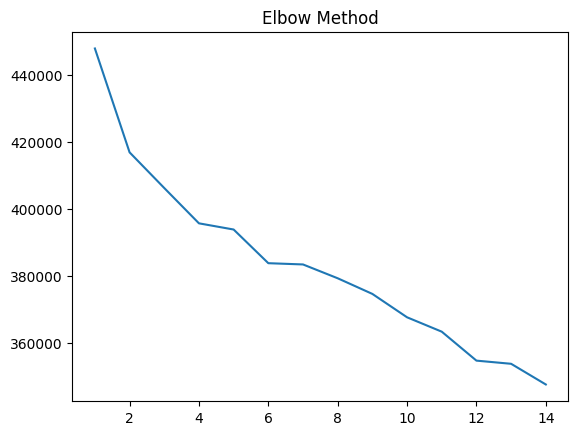

In [124]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(user_item_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.show()

In [125]:
# สร้างโมเดล K-Means
k_optimal = 3
kmeans_model = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42, n_init=10)

# 1. จัดกลุ่มผู้ใช้และเก็บผลลัพธ์ลงใน user_item_matrix
# .fit_predict() จะคืนค่า cluster สำหรับแต่ละผู้ใช้ใน matrix
cluster_labels = kmeans_model.fit_predict(user_item_matrix)
user_item_matrix['cluster'] = cluster_labels

# 2. รวมข้อมูล cluster กลับไปยัง final_df
# เราจะรวม final_df กับ DataFrame ที่มีแค่ User-ID และ cluster
final_df = pd.merge(final_df, user_item_matrix[['cluster']], on='User-ID', how='left')

print("DataFrame หลักหลังการเพิ่มคอลัมน์ cluster:")
print(final_df.head())

DataFrame หลักหลังการเพิ่มคอลัมน์ cluster:
   User-ID        ISBN  Book-Rating               Location   Age  \
0   277427  002542730X           10  gilbert, arizona, usa  48.0   
1   277427  006092988X            0  gilbert, arizona, usa  48.0   
2   277427  0060930535            0  gilbert, arizona, usa  48.0   
3   277427  0060934417            0  gilbert, arizona, usa  48.0   
4   277427  0061009059            9  gilbert, arizona, usa  48.0   

                                          Book-Title         Book-Author  \
0  Politically Correct Bedtime Stories: Modern Ta...   James Finn Garner   
1                           A Tree Grows in Brooklyn         Betty Smith   
2                      The Poisonwood Bible: A Novel  Barbara Kingsolver   
3                                 Bel Canto: A Novel        Ann Patchett   
4  One for the Money (Stephanie Plum Novels (Pape...     Janet Evanovich   

  Year-Of-Publication                  Publisher  \
0                1994  John Wiley &amp;

In [126]:
# สมมติว่า final_df มีคอลัมน์ 'cluster' ที่เราสร้างขึ้นแล้ว
cluster_id = 0 # สามารถเปลี่ยนเป็นค่าอื่นได้ เช่น 1, 2, 3

# กรองข้อมูลเฉพาะผู้ใช้ในกลุ่มนั้น
cluster_data = final_df[final_df['cluster'] == cluster_id]

# หาหนังสือยอดนิยม 10 อันดับแรกในกลุ่มนี้
popular_books_in_cluster = cluster_data.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(10)

print(f"หนังสือยอดนิยม 10 อันดับแรกสำหรับผู้ใช้ในกลุ่มที่ {cluster_id}:")
print(popular_books_in_cluster)

หนังสือยอดนิยม 10 อันดับแรกสำหรับผู้ใช้ในกลุ่มที่ 0:
Book-Title
Easy Prey                                  7
Lightning                                  6
1st to Die: A Novel                        5
Violets Are Blue                           5
The Pilot's Wife : A Novel                 5
The Secret Life of Bees                    5
The Summons                                5
Choke                                      5
Bridget Jones's Diary                      5
The Girls' Guide to Hunting and Fishing    5
Name: Book-Rating, dtype: int64


In [127]:
def recommend_for_user(user_id):
    """
    ฟังก์ชันสำหรับแนะนำหนังสือให้กับผู้ใช้
    """
    # ตรวจสอบว่า User-ID มีอยู่ใน user_item_matrix หรือไม่
    if user_id not in user_item_matrix.index:
        print(f"Error: ผู้ใช้ ID: {user_id} ไม่มีอยู่ในฐานข้อมูลที่ใช้สร้างโมเดล")
        return # หยุดการทำงานของฟังก์ชัน

    # 1. หาว่าผู้ใช้คนนั้นอยู่ในกลุ่มไหน
    user_cluster = user_item_matrix.loc[user_id]['cluster']

    # 2. กรองข้อมูลเฉพาะผู้ใช้ในกลุ่มนั้น
    cluster_data = final_df[final_df['cluster'] == user_cluster]

    # 3. หาหนังสือที่ได้รับความนิยมสูงสุดในกลุ่มนั้น
    popular_books_in_cluster = cluster_data.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)

    # 4. แสดงผลลัพธ์
    print(f"ผู้ใช้ ID: {user_id} ถูกจัดอยู่ในกลุ่มที่ {user_cluster}")
    print("\nหนังสือยอดนิยมในกลุ่มนี้ที่น่าจะเหมาะกับคุณ:")

    recommendations = popular_books_in_cluster.head(10)
    for title, count in recommendations.items():
        print(f"  - {title} (ได้รับคะแนน {count} ครั้ง)")

In [128]:
# แสดง User-ID ทั้งหมดใน user_item_matrix
print(user_item_matrix.index)

# หรือแสดงแค่ User-ID 10 อันดับแรก
print(user_item_matrix.index[:10])

Index([  3363,   6251,   6575,   7158,   7346,  11601,  11676,  12538,  13273,
        13552,
       ...
       268330, 269566, 269719, 271284, 271448, 273979, 274308, 275970, 277427,
       278418],
      dtype='int64', name='User-ID', length=217)
Index([3363, 6251, 6575, 7158, 7346, 11601, 11676, 12538, 13273, 13552], dtype='int64', name='User-ID')


In [129]:
# เลือก User-ID จาก DataFrame user_item_matrix ที่เราสร้างไว้
# ตัวอย่าง: user_id_to_recommend = 278858
# ลองตรวจสอบ user-id ที่คุณมีจาก user_item_matrix
# print(user_item_matrix.index)

# รันฟังก์ชันเพื่อดูคำแนะนำ
recommend_for_user(6251)

ผู้ใช้ ID: 6251 ถูกจัดอยู่ในกลุ่มที่ 1.0

หนังสือยอดนิยมในกลุ่มนี้ที่น่าจะเหมาะกับคุณ:
  - Bridget Jones's Diary (ได้รับคะแนน 120 ครั้ง)
  - The Notebook (ได้รับคะแนน 120 ครั้ง)
  - A Painted House (ได้รับคะแนน 119 ครั้ง)
  - The Pelican Brief (ได้รับคะแนน 118 ครั้ง)
  - The Firm (ได้รับคะแนน 113 ครั้ง)
  - Message in a Bottle (ได้รับคะแนน 112 ครั้ง)
  - Divine Secrets of the Ya-Ya Sisterhood: A Novel (ได้รับคะแนน 111 ครั้ง)
  - Wild Animus (ได้รับคะแนน 110 ครั้ง)
  - The Lovely Bones: A Novel (ได้รับคะแนน 108 ครั้ง)
  - Summer Sisters (ได้รับคะแนน 108 ครั้ง)


In [130]:
from sklearn.metrics import silhouette_score
score = silhouette_score(user_item_matrix, kmeans_model.labels_)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.38
